# ***Proyecto EDA: Airbnb*** 
**Autor:** Óscar Fernández-Chinchilla López

![Logo Airbnb](../images/airbnb-logo.png)



# 📚 Índice

   1. [Carga de datos](#carga)

      - [Importación del librerias y dependencias](#imporatacion-librerias)
      - [Importación del dataset](#imporatacion-dataset)
   2. [Comprobaciones iniciales](#comprobacion)
      - [Significados de los datos de cada columna](#significado)
      - [Inspección básica de tipos de datos](#inspeccion-datos)
         - [Errores en tipos de datos encontrados](#errores)

   3. [Exploración del dataset](#exploracion)
      - [Comprobación de nulos, duplicados y tipos con DataFrame](#nulos_duplicados_tipos)
         - [Revisión grupal de las columnas categóricas](#revision_categoricas) 
      - [Información sobre el rango de las variables](#rango_variables)
      - [Búsqueda individual de incoherencias](#busqueda_incoherencias)
      - [Incoherencias encontradas](#incoherencias)
   4. [Exploración visual y distribución inicial de las columnas](#exploracion_visual)
      - [Visualización gráfica del minimo de noches](#noches)
      - [Visualización gráfica de la disponibilidad](#disponibilidad)
      - [Visualización gráfica del numero de reviews por anuncio](#numero_reviews)
      - [Visualización gráfica del numero de reviews por mes](#reviews_por_mes)
      - [Visualización gráfica de la media de reviews](#media_reviews)
      - [Visualización gráfica de las habitaciones](#habitaciones)
      - [Visualización gráfica de las verificaciones](#verificaciones)
      - [Visualización gráfica del alquiler instantaneo](#alquiler)
      - [Visualización gráfica de las poblaciones (ciudades)](#poblaciones)
      - [Visualización gráfica de las politicas de cancelación](#cancelacion)
      - [Visualización gráfica de los años de contrucción del edificio](#anyos)
      - [Visualización gráfica del conteo de anuncios simulateno por anfitrión](#conteo_simultaneo)
   5. [Anotación sobre la columna de precio](#precio)




<a id="carga"></a>
# ***Carga de Datos***

<a id="imporatacion-librerias"></a>
## ***Importación de librerias***
### Para el proyecto utilizare librerias como pandas y numpy entre otras.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<a id="imporatacion-dataset"></a>
# ***Importación del dataset***

In [3]:
airbnb_df = pd.read_csv("../data/Airbnb_Open_Data.csv", low_memory=False) # Añado el parametro low_memory para que no salga el aviso de datos mezclados del csv


<a id="comprobacion"></a>
# ***Comprobación inicial de las dimensiones del dataset***

In [4]:
# Compruebo las dimensiones del dataframe
airbnb_df.shape

(102599, 26)

In [ ]:
# Muestro las primeras 3 filas para comprobar como estan las columnas y filas del dataset en crudo y a primera vista
airbnb_df.head(3)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
0,1001254,Clean & quiet apt home by the park,80014485718,unconfirmed,Madaline,Brooklyn,Kensington,40.64749,-73.97237,United States,...,$193,10.0,9.0,10/19/2021,0.21,4.0,6.0,286.0,Clean up and treat the home the way you'd like...,NaN
1,1002102,Skylit Midtown Castle,52335172823,verified,Jenna,Manhattan,Midtown,40.75362,-73.98377,United States,...,$28,30.0,45.0,5/21/2022,0.38,4.0,2.0,228.0,Pet friendly but please confirm with me if the...,NaN
2,1002403,THE VILLAGE OF HARLEM....NEW YORK !,78829239556,NaN,Elise,Manhattan,Harlem,40.80902,-73.94190,United States,...,$124,3.0,0.0,NaN,NaN,5.0,1.0,352.0,"I encourage you to use my kitchen, cooking and...",NaN


In [5]:
# Muestro las ultimas 3 filas 
airbnb_df.tail(3)

,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
102596,6093542,"Comfy, bright room in Brooklyn",69050334417,unconfirmed,Megan,Brooklyn,Park Slope,40.67505,-73.98045,United States,...,$198,3.0,0.0,NaN,NaN,5.0,1.0,342.0,NaN,NaN
102597,6094094,Big Studio-One Stop from Midtown,11160591270,unconfirmed,Christopher,Queens,Long Island City,40.74989,-73.93777,United States,...,$109,2.0,5.0,10/11/2015,0.1,3.0,1.0,386.0,NaN,NaN
102598,6094647,585 sf Luxury Studio,68170633372,unconfirmed,Rebecca,Manhattan,Upper West Side,40.76807,-73.98342,United States,...,$206,1.0,0.0,NaN,NaN,3.0,1.0,69.0,NaN,NaN


In [8]:
# Muestro todas las columnas del dataframe
airbnb_df.columns

Index(['id', 'NAME', 'host id', 'host_identity_verified', 'host name',
       'neighbourhood group', 'neighbourhood', 'lat', 'long', 'country',
       'country code', 'instant_bookable', 'cancellation_policy', 'room type',
       'Construction year', 'price', 'service fee', 'minimum nights',
       'number of reviews', 'last review', 'reviews per month',
       'review rate number', 'calculated host listings count',
       'availability 365', 'house_rules', 'license'],
      dtype='object')

<a id="significado"></a>
# ***🗂️ Significado de los datos de las siguientes columnas:***

- **`id`**: Identificador único del anuncio.
- **`NAME`**: Nombre o título del alojamiento.
- **`host id`**: ID único del anfitrión.
- **`host_identity_verified`**: Indica si la identidad del anfitrión está verificada.
- **`host name`**: Nombre público del anfitrión.
- **`neighbourhood group`**: Zona o distrito principal.
- **`neighbourhood`**: Barrio específico.
- **`lat`**: Latitud del alojamiento.
- **`long`**: Longitud del alojamiento.
- **`country`**: País del anuncio.
- **`country code`**: Código ISO del país.
- **`instant_bookable`**: Reserva instantánea disponible (sí/no).
- **`cancellation_policy`**: Política de cancelación del anuncio.
- **`room type`**: Tipo de habitación (entero, privado, compartido, hotel).
- **`Construction year`**: Año de construcción del edificio.
- **`price`**: Precio por noche.
- **`service fee`**: Tarifa de servicio añadida.
- **`minimum nights`**: Mínimo de noches por reserva.
- **`number of reviews`**: Cantidad total de reseñas.
- **`last review`**: Fecha de la última reseña.
- **`reviews per month`**: Reseñas promedio por mes.
- **`review rate number`**: Puntuación media del anuncio.
- **`calculated host listings count`**: Número de anuncios gestionados por el anfitrión.
- **`availability 365`**: Días disponibles al año (0–365).
- **`house_rules`**: Normas del alojamiento.
- **`license`**: Número o código de licencia turística.

<a id="inspeccion-datos"></a>
# ***Inspección de datos básico***

In [ ]:
# Muestro el tipo de datos que contiene cada columna para verificar si alguna no tiene el tipo que deberia
airbnb_df.dtypes

id                                  int64
NAME                               object
host id                             int64
host_identity_verified             object
host name                          object
neighbourhood group                object
neighbourhood                      object
lat                               float64
long                              float64
country                            object
country code                       object
instant_bookable                   object
cancellation_policy                object
room type                          object
Construction year                 float64
price                              object
service fee                        object
minimum nights                    float64
number of reviews                 float64
last review                        object
reviews per month                 float64
review rate number                float64
calculated host listings count    float64
availability 365                  

<a id="errores"></a>
## ***Errores de tipos por columnas encontrados:***
- La columna "instant_bookable" es de tipo Object (debería ser Bool)
- El año de contrucción es de tipo Float
- Tanto el precio como el coste de servicio son de tipo Object (contendrán simbolos que habrá que limpiar)
- Las noches mínimas es de tipo Float
- El número de reviews es de tipo Float (mejor si fuerea Integer)
- El conteo de anuncios por anfitrión deberia ser Integer y es Float
- Para la disponibilidad es Float y no Integer

In [ ]:
# Utilizamos también info() para comprobar la cantidad de no nulos por columna
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

<a id="exploracion"></a>
# ***Exploración del dataset***
### En este apartado exploraremos todas las columnas para comprobar cual contiene duplicados, nulos y columnas irrelevantes para el análisis y asi luego proceder con la limpieza del dataset.

In [ ]:
# Comprobamos la columna de Id para ver si contiene duplicados
airbnb_df["id"].duplicated().sum()

np.int64(541)

In [72]:
# Sacamos los valores duplicados y los ordenamos por id para ver si son exactamente el mismo anuncio
airbnb_df[airbnb_df["id"].duplicated(keep=False)].sort_values("id").head(2)


,id,NAME,host id,host_identity_verified,host name,neighbourhood group,neighbourhood,lat,long,country,...,service fee,minimum nights,number of reviews,last review,reviews per month,review rate number,calculated host listings count,availability 365,house_rules,license
9098,6026161,Upper East Side 2 bedroom- close to Hospitals-,65193709566,verified,Juliana,Manhattan,Upper East Side,40.76222,-73.9603,United States,...,$21,30.0,2.0,6/8/2019,0.21,3.0,34.0,157.0,NaN,NaN
102474,6026161,Upper East Side 2 bedroom- close to Hospitals-,65193709566,verified,Juliana,Manhattan,Upper East Side,40.76222,-73.9603,United States,...,$21,30.0,2.0,6/8/2019,0.21,3.0,34.0,157.0,NaN,NaN


<a id="nulos_duplicados_tipos"></a>
## ***Comprobación de duplicados, nulos y tipos de cada columna***
### Para no realizar el paso anterior 2 veces por columna, creamos el siguiente dataframe para que nos de toda la informacion..

In [ ]:
# Creamos un dataframe resumen con información básica de calidad por columna:
# - Número de valores nulos
# - Número de valores duplicados dentro de cada columna
# - Tipo de dato actual
airbnb_exploratory = pd.DataFrame({
        "nulos" : airbnb_df.isna().sum(),
        "duplicados" : airbnb_df.apply(lambda columna: columna.duplicated().sum()),
        "tipo" : airbnb_df.dtypes
})
airbnb_exploratory

,nulos,duplicados,tipo
id,0,541,int64
NAME,250,41317,object
host id,0,542,int64
host_identity_verified,289,102596,object
host name,406,89408,object
neighbourhood group,29,102591,object
neighbourhood,16,102374,object
lat,8,80607,float64
long,8,84824,float64
country,532,102597,object


<a id="revision_categoricas"></a>
### ***Revisión de algunas columnas sospechosas***

In [ ]:
# Seleccionamos las columnas categoricas del Dataset excluyendo las numéricas.
non_numeric_cols = airbnb_df.select_dtypes(exclude=['number']).columns
non_numeric_cols


Index(['NAME', 'host_identity_verified', 'host name', 'neighbourhood group',
       'neighbourhood', 'country', 'country code', 'instant_bookable',
       'cancellation_policy', 'room type', 'price', 'service fee',
       'last review', 'house_rules', 'license'],
      dtype='object')

In [ ]:
# Creamos una lista con todas las columnas categoricas para luego mostrar con un bucle los diferentes valores unicos que puede tener cada columna.
# Esto nos permitirá saber si el tipo de alguna columna no concuerda con el valor designado en las mismas.
columna_categoria_list = [
    "host_identity_verified",
    "instant_bookable",
    "cancellation_policy",
    "room type",
    "country",
    "country code",
    "neighbourhood group",
    "neighbourhood",
    "license"   
]
for i in columna_categoria_list:
    print(f"Columna: {i}")
    print(airbnb_df[i].unique())

Columna: host_identity_verified
['unconfirmed' 'verified' nan]
Columna: instant_bookable
[False True nan]
Columna: cancellation_policy
['strict' 'moderate' 'flexible' nan]
Columna: room type
['Private room' 'Entire home/apt' 'Shared room' 'Hotel room']
Columna: country
['United States' nan]
Columna: country code
['US' nan]
Columna: neighbourhood group
['Brooklyn' 'Manhattan' 'brookln' 'manhatan' 'Queens' nan 'Staten Island'
 'Bronx']
Columna: neighbourhood
['Kensington' 'Midtown' 'Harlem' 'Clinton Hill' 'East Harlem'
 'Murray Hill' 'Bedford-Stuyvesant' "Hell's Kitchen" 'Upper West Side'
 'Chinatown' 'South Slope' 'West Village' 'Williamsburg' 'Fort Greene'
 'Chelsea' 'Crown Heights' 'Park Slope' 'Windsor Terrace' 'Inwood'
 'East Village' 'Greenpoint' 'Bushwick' 'Flatbush' 'Lower East Side'
 'Prospect-Lefferts Gardens' 'Long Island City' 'Kips Bay' 'SoHo'
 'Upper East Side' 'Prospect Heights' 'Washington Heights' 'Woodside'
 'Brooklyn Heights' 'Carroll Gardens' 'Gowanus' 'Flatlands' 'Co

<a id="rango_variables"></a>
## ***Comprobación del rango de todas las variables numéricas del dataset***

In [7]:
# Utilizo describe porque aporta toda la informacion como máximo, mínimo, media, etc.
airbnb_df.describe().round(2)

,id,host id,lat,long,Construction year,minimum nights,number of reviews,reviews per month,review rate number,calculated host listings count,availability 365
count,102599.00,1.025990e+05,102591.00,102591.00,102385.00,102190.00,102416.00,86720.00,102273.00,102280.00,102151.00
mean,29146234.52,4.925411e+10,40.73,-73.95,2012.49,8.14,27.48,1.37,3.28,7.94,141.13
std,16257505.61,2.853900e+10,0.06,0.05,5.77,30.55,49.51,1.75,1.28,32.22,135.44
min,1001254.00,1.236005e+08,40.50,-74.25,2003.00,-1223.00,0.00,0.01,1.00,1.00,-10.00
25%,15085814.50,2.458333e+10,40.69,-73.98,2007.00,2.00,1.00,0.22,2.00,1.00,3.00
50%,29136603.00,4.911774e+10,40.72,-73.95,2012.00,3.00,7.00,0.74,3.00,1.00,96.00
75%,43201198.00,7.399650e+10,40.76,-73.93,2017.00,5.00,30.00,2.00,4.00,2.00,269.00
max,57367417.00,9.876313e+10,40.92,-73.71,2022.00,5645.00,1024.00,90.00,5.00,332.00,3677.00


<a id="busqueda_incoherencias"></a>
## ***Para buscar incoherencias, analizaré individualmente algunas columnas:***

In [6]:
# Dado que la disponibilidad se comprende de 0 a 365 dias, buscamos si hay filas con valores negativos en esta columna
airbnb_df[(airbnb_df["availability 365"] < 0)].shape

(432, 26)

In [ ]:
# Lo mismo ocurre si hay filas con valores de disponibilidad superiores a 365
airbnb_df[(airbnb_df["availability 365"] > 365)].shape

(2782, 26)

In [ ]:
# Debe haber al menos un minimo de noches para hospedarse, por lo que el valor no puede ser negativo o 0
airbnb_df[(airbnb_df["minimum nights"] <= 0)].shape

(13, 26)

In [ ]:
# No puede haber un numero total de reviews sin que tenga una media de reviews por mes
airbnb_df[(airbnb_df["number of reviews"] > 0) & (airbnb_df["reviews per month"] <= 0)].shape

(0, 26)

In [31]:
# Se aplica a viceversa que la celda anterior, no puedes tener una media de reviews por mes con un total de 0 reviews o negativo
airbnb_df[(airbnb_df["reviews per month"] > 0) & (airbnb_df["number of reviews"] <= 0)].shape

(0, 26)

In [ ]:
# No tiene coherencia que haya una media de las reviews en pisos que tienen un numero total de reviews igual o inferior a 0
airbnb_df[(airbnb_df["review rate number"] > 0) & (airbnb_df["number of reviews"] <= 0)].shape

(15701, 26)

In [ ]:
# Cuando un host da de alta un anuncio, al menos debe aparecer con 1, sino indicaria incoherencia
airbnb_df[(airbnb_df["calculated host listings count"] <= 0)].shape

(0, 26)

In [ ]:
# Establezco limites para pisos muy antiguos o que pongan que se hayan construido en un año mas en el futuro que en el que estamos
airbnb_df[(airbnb_df["Construction year"] < 1850) & (airbnb_df["Construction year"] >2025)].shape

(0, 26)

<a id="incoherencias"></a>
## ***Incoherencias que se han podido observar:***
- Hay anuncios de pisos que estan duplicados (por id del anuncio)
- Columnas como "price" y "service fee" aparecen como objeto y no como integer o float 
- La columna "Construction year" seria mejor que fuese de tipo Integer y no float
- La columna de "license" esta completamente llena de nulos 
    - Contiene incoherencia al detectar el valor `41662/AL` como licencia turística, pero este formato **no corresponde a Nueva York** sino a Portugal.
        - Mala entrada de datos o registro mal clasificado
- La mitad de la columna "house_rules" aparece como nula 
- La columna "instant_bookable" contiene valores True o False pero aparece como Object, lo que indica que estan puestos como String
- Hay valores mal escritos en las columnas categoricas de "neighbourhood group"
- Hay valores en la columna "availability 365" que son o menores que 0, o mayores de 365
- Es incoherente que la columna de "minimum nights" tenga valores negativos
- En cuanto a la media de reviews de un anuncio, es incoherente que para las que tengan un número total igual a 0, su media sea mayor a 0.
- **Asignación incorrecta de barrios a boroughs:**
  - Ejemplo: `Chelsea, Staten Island` → el barrio *Chelsea* pertenece realmente a **Manhattan**, no a Staten Island.
- Incoherencia en la columna "minimum nights", hay que averiguar porque hay valores en negativo y tratarlos

# ***Distribución inicial de las columnas***

<a id="noches"></a>
## ***Boxplot del minimo de noches por anuncio***

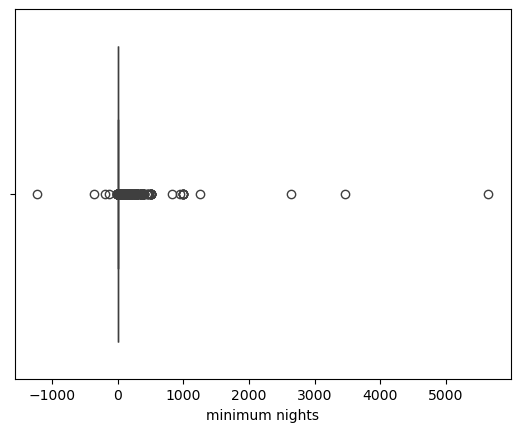

In [ ]:
# Boxplot sin limitaciones del eje para analizar la distribución completa de 'minimum nights'.
# Esto permite identificar la presencia de valores extremos (outliers) y posibles incoherencias, aunque la visualización pueda verse comprimida debido a esos valores anómalos.
sns.boxplot(x=airbnb_df["minimum nights"])
plt.show()

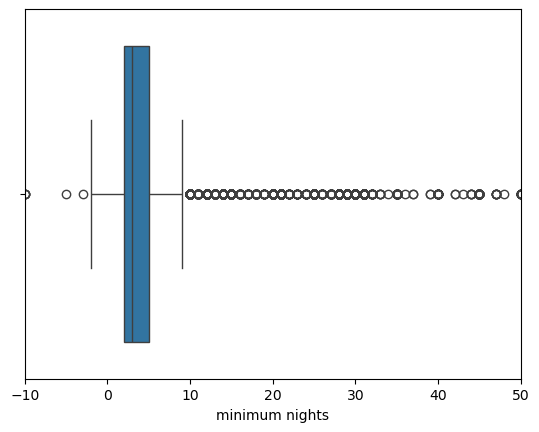

In [ ]:
# Boxplot limitado a un máximo de 50 noches para visualizar correctamente la distribución central.
# Esta limitación no elimina datos, solo ajusta el rango visible para detectar valores atípicos y observar a partir de qué punto comienzan los outliers en la variable 'minimum nights'.
sns.boxplot(x=airbnb_df["minimum nights"])
plt.xlim(-10, 50)  # Ajusta el rango visible
plt.show()

<a id="disponibilidad"></a>
## ***Boxplot de la disponibilidad (365 dias del año)***

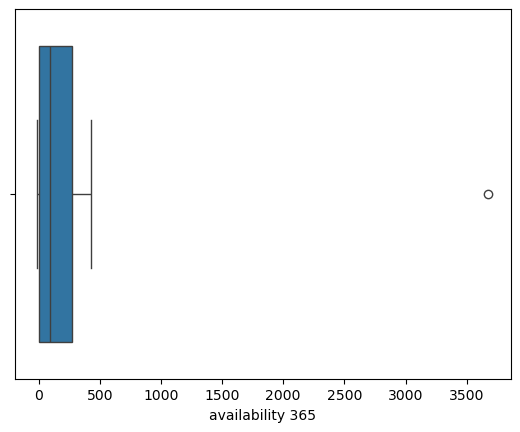

In [ ]:
# Boxplot sin limitaciones para analizar la distribución de 'availability 365'.
# Esta visualización nos permite detectar valores extremos y patrones inusuales en los días de disponibilidad al año.
# Debido a que el valor máximo posible es 365 días, cualquier concentración en los extremos podría indicar comportamientos atípicos como alojamientos que casi nunca se alquilan o que están disponibles todo el año.
sns.boxplot(x=airbnb_df["availability 365"])
plt.show()

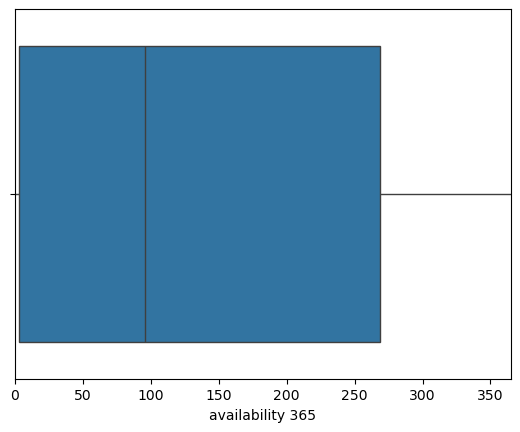

In [ ]:
# Boxplot limitado al rango lógico (0-365 días) para observar la distribución real de la disponibilidad anual.
# Esto nos ayuda a identificar alojamientos con disponibilidad excesiva (posible gestión profesional)
# y aquellos casi no disponibles, además de comprobar si existen valores inválidos > 365.
sns.boxplot(x=airbnb_df["availability 365"])
plt.xlim(0,365)
plt.show()

### Al limitar el rango del boxplot a valores entre 0 y 365 días —máximo lógico de la variable— podemos observar mejor la distribución real de la disponibilidad. Este ajuste permite identificar claramente los outliers y comprobar si existen valores inválidos por encima del límite natural del año, lo que indicaría incoherencias o errores en los datos.

<a id="numero_reviews"></a>
## ***Boxplot  de numero de reviews***

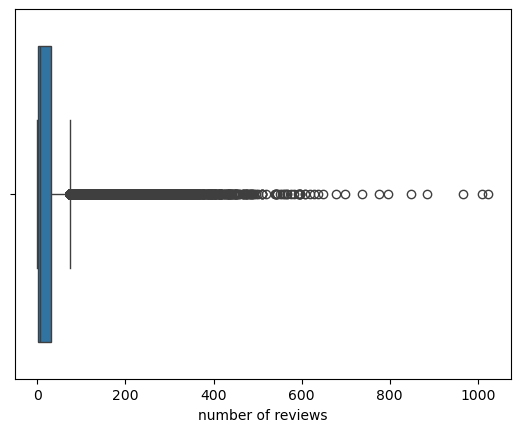

In [ ]:
# Boxplot para analizar la distribución de 'number of reviews'.
# Este gráfico permite identificar la presencia de valores extremos (outliers), ya que algunos alojamientos pueden recibir muchas más reseñas que la mayoría.
# Es útil para detectar concentración de valores bajos y posibles sesgos hacia pocos comentarios.
sns.boxplot(x=airbnb_df["number of reviews"])
plt.show()

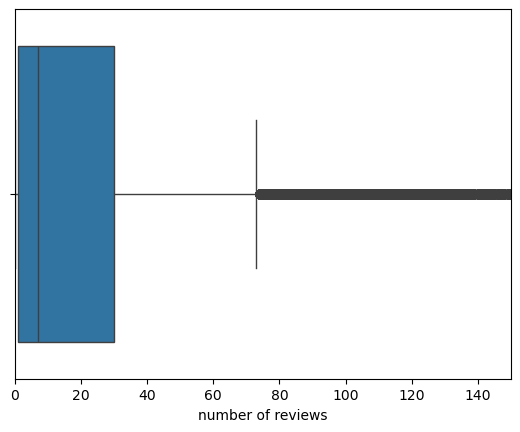

In [43]:
# Hacemos otro histograma para el analisis visual de la columna "number of reviews"
sns.boxplot(x=airbnb_df["number of reviews"])
plt.xlim(0, 150)
plt.show()

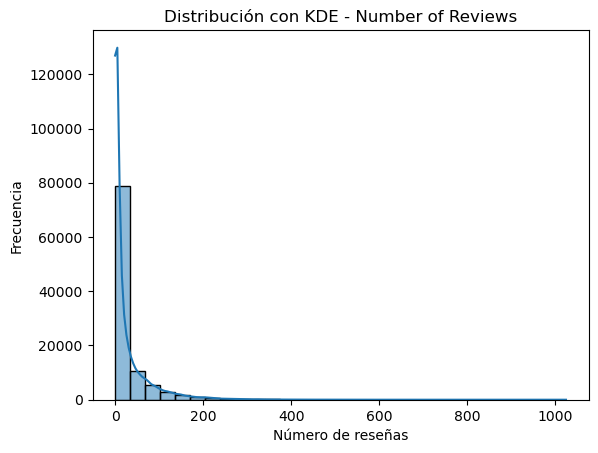

In [34]:
# Histograma con KDE para analizar la distribución de 'number of reviews'.
# Este gráfico permite observar la concentración de la mayoría de los alojamientos en valores bajos de reseñas, lo que indica una distribución fuertemente sesgada.
sns.histplot(airbnb_df["number of reviews"], kde=True, bins=30)
plt.title("Distribución con KDE - Number of Reviews")
plt.xlabel("Número de reseñas")
plt.ylabel("Frecuencia")
plt.show()

### La mayoría de los alojamientos presentan un número reducido de reseñas, mientras que unos pocos anuncios acumulan un volumen muy elevado. Esto provoca que la distribución esté fuertemente sesgada hacia la izquierda y que el boxplot muestre una gran cantidad de outliers.

<a id="reviews_por_mes"></a>
## ***Boxplot del número de reviews por mes***

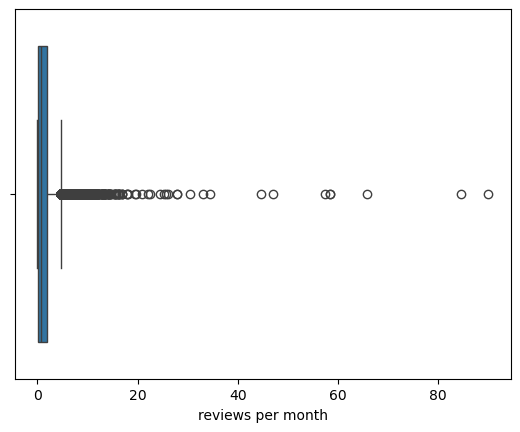

In [11]:
# Boxplot para analizar la distribución de 'number of reviews'.
# Este gráfico permite identificar la presencia de valores extremos (outliers), ya que algunos alojamientos pueden recibir muchas más reseñas que la mayoría.
# Es útil para detectar concentración de valores bajos y posibles sesgos.
sns.boxplot(x=airbnb_df["reviews per month"])
plt.show()

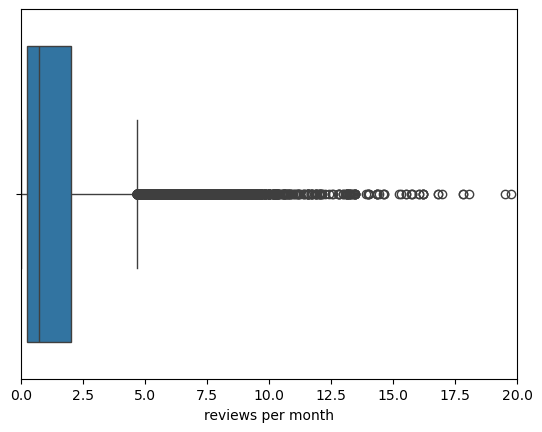

In [ ]:
# Boxplot de 'reviews per month' limitado al rango 0–20.
# Este ajuste permite visualizar mejor la distribución real sin que los valores extremos (outliers) distorsionen la gráfica. En Airbnb es habitual que la mayoría de alojamientos reciban pocas reseñas
# Este recorte facilita identificar el comportamiento central de la variable.
sns.boxplot(x=airbnb_df["reviews per month"])
plt.xlim(0,20)
plt.show()

<a id="media_reviews"></a>
# ***Countplot de la media de las reviews***

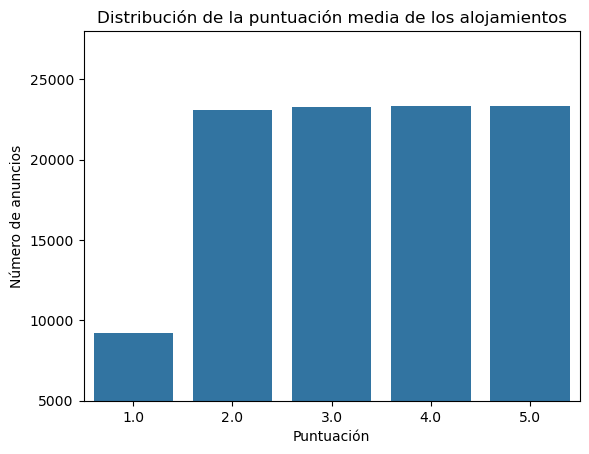

In [32]:
# Countplot para visualizar la distribución de la puntuación media ('review rate number').
# Ajustamos el eje Y para apreciar mejor las diferencias entre categorías, ya que la mayoría de los alojamientos tienden a obtener puntuaciones altas en plataformas como Airbnb.
sns.countplot(x=airbnb_df["review rate number"])
plt.title("Distribución de la puntuación media de los alojamientos")
plt.xlabel("Puntuación")
plt.ylabel("Número de anuncios")
plt.ylim(5000, 28000)
plt.show()

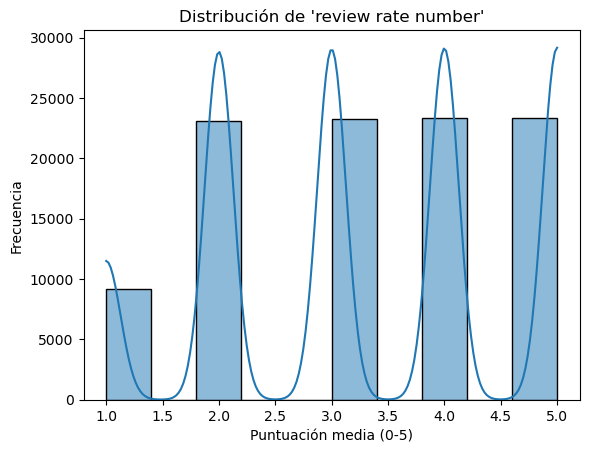

In [33]:
# Otro histograma diferente
sns.histplot(airbnb_df["review rate number"].dropna(), kde=True, bins=10)
plt.title("Distribución de 'review rate number'")
plt.xlabel("Puntuación media (0-5)")
plt.ylabel("Frecuencia")
plt.show()

<a id="habitaciones"></a>
## ***Countplot de los tipos de habitaciones***

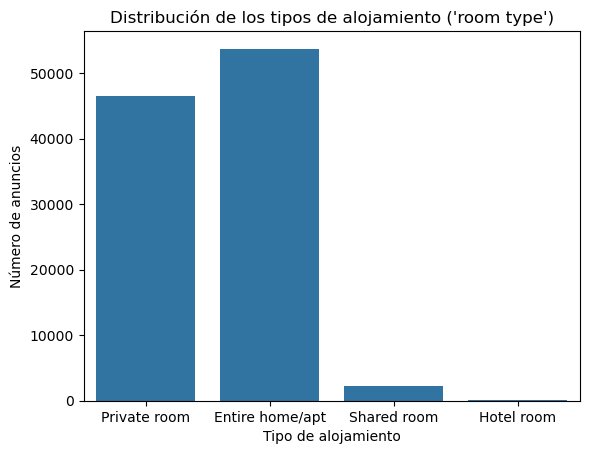

In [15]:
# Gráfico de barras (countplot) para visualizar la distribución de los distintos "room type".
# Este gráfico permite identificar qué tipos de alojamiento son más comunes en la plataforma, y comparar la frecuencia entre habitaciones privadas, apartamentos completos, habitaciones compartidas y hotel rooms.
sns.countplot(x=airbnb_df["room type"])
plt.title("Distribución de los tipos de alojamiento ('room type')")
plt.xlabel("Tipo de alojamiento")
plt.ylabel("Número de anuncios")
plt.show()

<a id="verificaciones"></a>
## ***Countplot de las verificaciones***

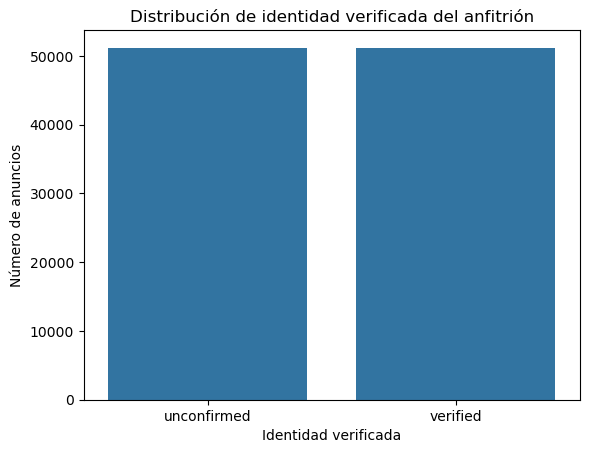

In [17]:
# Gráfico de barras (countplot) para visualizar la distribución de la verificación de identidad del anfitrión.
# Este análisis permite conocer cuántos anfitriones tienen la identidad verificada frente a los que no la tienen, una característica que puede influir en la confianza del huésped y, en consecuencia, en las reservas.
sns.countplot(x=airbnb_df["host_identity_verified"])
plt.title("Distribución de identidad verificada del anfitrión")
plt.xlabel("Identidad verificada")
plt.ylabel("Número de anuncios")
plt.yticks(np.arange(0, 60000, 10000))
plt.show()

<a id="alquiler"></a>
## ***Countplot de el alquiler intantaneo***

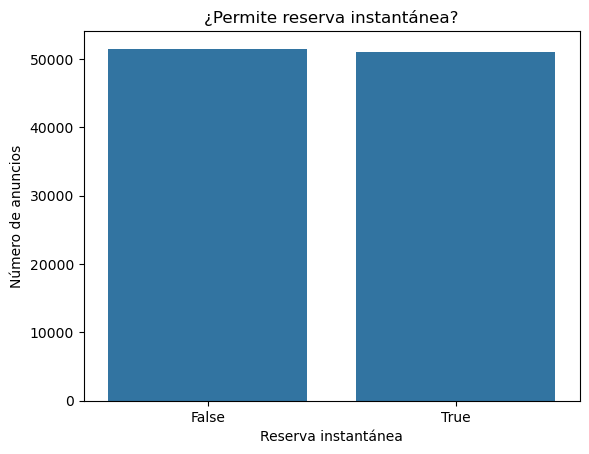

In [18]:
# Countplot para analizar la distribución de alojamientos que permiten la reserva instantánea.
# Esta característica es importante ya que puede influir en la decisión del huésped
# Los alojamientos con reserva inmediata suelen recibir más reservas y reseñas.
sns.countplot(x=airbnb_df["instant_bookable"])
plt.title("¿Permite reserva instantánea?")
plt.xlabel("Reserva instantánea")
plt.ylabel("Número de anuncios")
plt.show()

<a id="poblaciones"></a>
# ***Countplot de los anuncios por poblaciones (borough)***

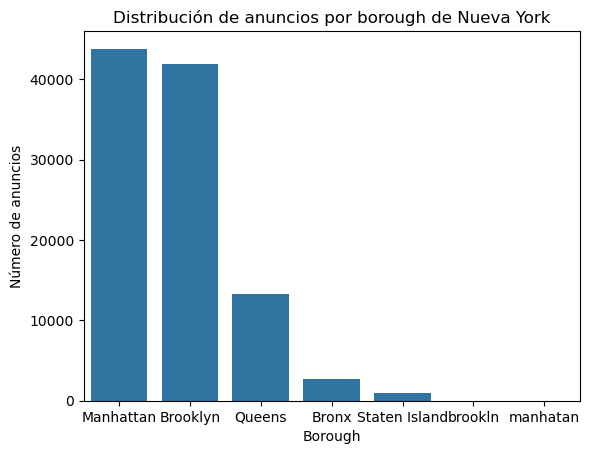

In [ ]:
# Countplot para analizar la distribución de anuncios por 'neighbourhood group' (boroughs de NYC).
# Este gráfico permite observar en qué distrito se concentran más alojamientos dentro de la ciudad, información clave para futuros análisis de precios, reseñas y disponibilidad según la ubicación.
sns.countplot(x=airbnb_df["neighbourhood group"], order=airbnb_df["neighbourhood group"].value_counts().index)
plt.title("Distribución de anuncios por borough de Nueva York")
plt.xlabel("Borough")
plt.ylabel("Número de anuncios")
plt.show()

<a id="cancelacion"></a>
# ***Countplot de las politicas de cancelación***

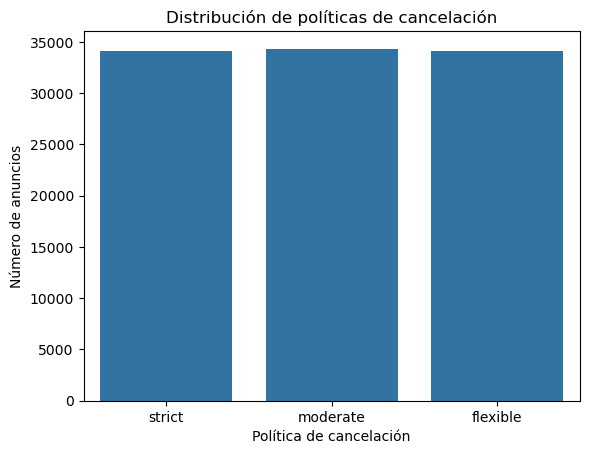

In [ ]:
# Countplot para visualizar la distribución de las políticas de cancelación en los anuncios.
# Esto permite identificar qué políticas son más habituales en el mercado y cómo podría afectar la flexibilidad del anfitrión a la decisión del huésped y a la demanda del alojamiento.
sns.countplot(x=airbnb_df["cancellation_policy"])
plt.title("Distribución de políticas de cancelación")
plt.xlabel("Política de cancelación")
plt.ylabel("Número de anuncios")
plt.show()

<a id="anyos"></a>
# ***Histograma de los años de contrucción***

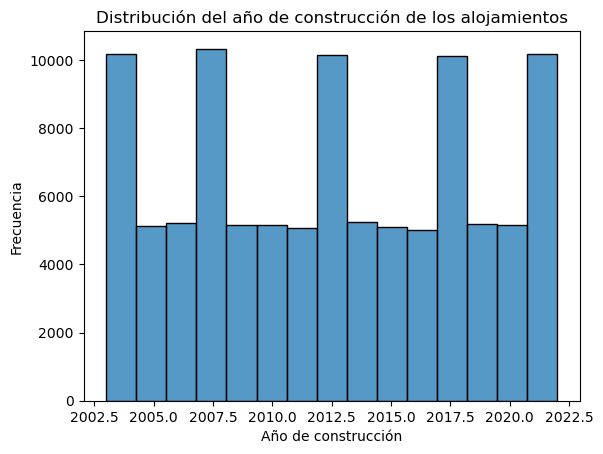

In [ ]:
# Histograma para analizar la distribución de la variable 'Construction year'.
# Esta visualización nos permite identificar tendencias en la antigüedad de los edificios donde se ubican los alojamientos, así como detectar posibles valores atípicos o inconsistentes (años muy antiguos o futuros).
sns.histplot(x=airbnb_df["Construction year"], bins=15)
plt.title("Distribución del año de construcción de los alojamientos")
plt.xlabel("Año de construcción")
plt.ylabel("Frecuencia")
plt.show()

<a id="conteo_simultaneo"></a>
# ***Boxplot de la cuenta de anuncios simultaneos por anunciante***

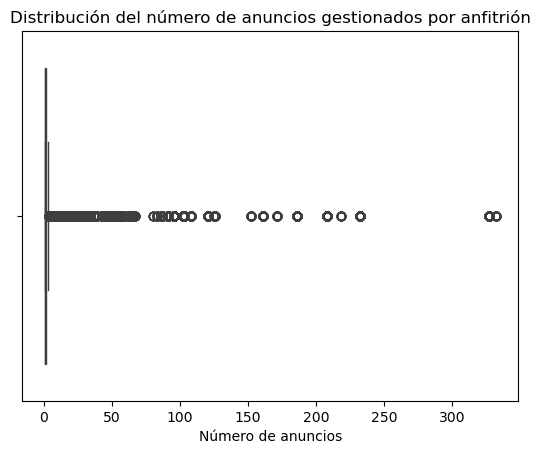

In [25]:
# Boxplot para analizar la distribución del número de anuncios por anfitrión.
# Esta visualización permite detectar la presencia de anfitriones con muchos anuncios, lo que suele indicar actividad profesional dentro de la plataforma.
sns.boxplot(x=airbnb_df["calculated host listings count"])
plt.title("Distribución del número de anuncios gestionados por anfitrión")
plt.xlabel("Número de anuncios")
plt.show()

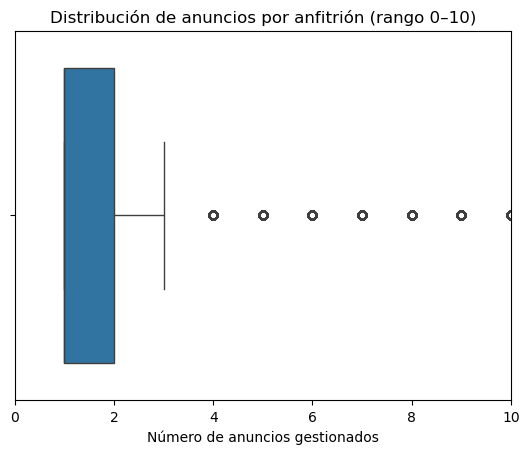

In [26]:
# Boxplot limitado al rango 0–10 para visualizar la distribución central de 'calculated host listings count'.
# La mayoría de los anfitriones gestionan pocos anuncios, por lo que este recorte del eje permite identificar mejor patrones en los valores típicos y detectar a partir de qué punto aparecen los hosts profesionales.
sns.boxplot(x=airbnb_df["calculated host listings count"])
plt.title("Distribución de anuncios por anfitrión (rango 0–10)")
plt.xlabel("Número de anuncios gestionados")
plt.xlim(0, 10)
plt.show()

### La mayoría de los anfitriones gestionan un único anuncio, mientras que existe un grupo reducido de anfitriones que gestionan decenas o incluso cientos de propiedades. Estos casos se consideran outliers y representan a los llamados "hosts profesionales", cuya actividad alquilando múltiples viviendas está más ligada a un modelo de negocio que a un uso personal de Airbnb.

### Dado que estos outliers pueden influir significativamente en el análisis de precios, reseñas y disponibilidad, será importante tratarlos o analizarlos por separado durante la fase de limpieza.

Al limitar la visualización al rango 0–10 anuncios por anfitrión, se observa claramente que la gran mayoría
de anfitriones publican solo un alojamiento y un porcentaje menor controla entre 2 y 3 anuncios. A partir
de ahí, los valores comienzan a ser más inusuales y representan casos de anfitriones profesionales.

Este patrón sugiere una coexistencia entre usuarios particulares y negocios turísticos dentro de la plataforma,
lo cual será interesante analizar más adelante en relación al precio, número de reseñas o disponibilidad.

<a id="precio"></a>
# ***Nota sobre la columna `price`***

La columna `price` no se analiza todavía porque actualmente es de tipo `object`. 
Esto se debe a que contiene símbolos (`$`), comas u otros caracteres que impiden convertirla directamente a formato numérico.

Antes de poder realizar histogramas, boxplots o correlaciones, será necesario limpiar esta columna y transformarla a tipo `float`.

Por este motivo, su análisis se realizará más adelante en la fase de **limpieza del dataset**.